# Introdução a Curvas Utilizando Manim e Sympy



**Autor**: Caio Lins

Este trabalho tem como objetivo introduzir conceitos da teoria de curvas planas e espaciais, utilizando as bibliotecas `Sympy` e `Manim` da linguagem de programação `Python`.

Ele está organizado nos seguintes tópicos:

* Ambiente Computacional
* Teoria de Curvas
    - O que é uma curva?
    - Velocidade e aceleração
    - Comprimento de arco e reparametrizações
    - Curvas em R<sup>3</sup>
    - Referências


## Ambiente Computacional

Utilizaremos a linguagem Python 3. A versão específica utilizada na elaboração desse documento é a 3.8.10.

A biblioteca [`Sympy`](https://www.sympy.org/en/index.html) permite a realização de cálculos simbólicos dentro de `Python` e será utilizada para computar algumas derivadas e integrais inerentes ao estudo da Geometria Diferencial.

Por outro lado, a biblioteca [`Manim`](https://docs.manim.community/en/stable/index.html) facilita imensamente a criação de animações envolvendo objetos matemáticos.
Ela surgiu como um projeto pessoal do YouTuber, e graduado em Matemática e Ciência da Computação por Stanford, Grant Sanderson, em seu (excelente!) canal [3Blue1Brown](https://www.youtube.com/c/3blue1brown).
Atualmente, ela é mantida como um projeto da comunidade.

Nos links acima é possível encontrar instruções para realizar a instalação de ambas bibliotecas.
Para a `Manim`, recomendamos instalá-la localmente, junto com todas as dependências listadas (opcionais e obrigatórias).

Caso não queira fazer isso no momento, uma opção é abrir esse notebook no Google Colab e executar a célula seguinte:

In [1]:
## Execute only when in colab

if 'google.colab' in str(get_ipython()):
    print('Running on Colab\n')
    !git clone https://github.com/Caioflp/curves-and-surfaces.git
    %cd curves-and-surfaces/part-1
    # !rm 'Introdução a Curvas Utilizando Manim e Sympy.ipynb'
    !sudo apt update
    !sudo apt install libcairo2-dev ffmpeg \
        texlive texlive-latex-extra texlive-fonts-extra \
        texlive-latex-recommended texlive-science \
        tipa libpango1.0-dev
    !pip install manim
    !pip install IPython --upgrade
    !pip install sympy
else:
    print('Not running on Colab')

Not running on Colab


A formatação desse caderno é retirada do curso [Practical Numerical Methods with Python](https://github.com/numerical-mooc/numerical-mooc), com código licenciado sob a MIT license (c) 2014 L.A. Barba, C. Cooper, G.F. Forsyth, A. Krishnan. Para carrega-lá, basta executar a célula seguinte.

In [2]:
# Load notebook style
from IPython.core.display import HTML
from os import getcwd
css_file = f'{getcwd()}/../styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())

## Teoria de Curvas

### O que é uma curva?

Seja $I \subset \mathbb{R}$ um intervalo aberto.
Uma aplicação diferenciável (aqui, diferenciável significa $C^\infty$)
$$
    \alpha : I \to \mathbb{R}^n
$$
é dita uma *curva parametrizada diferenciável*, ou, simplesmente *curva* (esses termos serão usados como sinônimos nesse tutorial).
Seu conjunto imagem, denotado por $\alpha(I) \subset \mathbb{R}^n$, é denominado *traço* de $\alpha$.

Em particular, caso $n = 2$, a função $\alpha$ pode ser escrita como
$$
    \alpha(t) = ( x(t), y(t) ),
$$
Onde $x, y : I \to \mathbb{R}$ são diferenciáveis.
Similarmente, se $n = 3$:
$$
    \alpha(t) = ( x(t), y(t), z(t) ).
$$

#### Exemplo: O círculo

Seja $S^1 \subset \mathbb{R^2}$ o círculo unitário centrado na origem:
$$
    S^1 = \{ (x, y) \in \mathbb{R}^2 : x^2 + y^2 = 1 \}
$$
Perceba que $S^1$ é o traço da curva $\alpha : [0, 2 \pi] \to \mathbb{R}^2$ dada por
$$
    \alpha (t) = (\cos t, \sin t).
$$

Vamos desenhar esse objeto utilizando a `Manim`. Primeiro, apresentaremos o código e, em seguida, explicaremos seus principais elementos.

In [1]:
import numpy as np
from manim import *

Manim Community v0.15.1

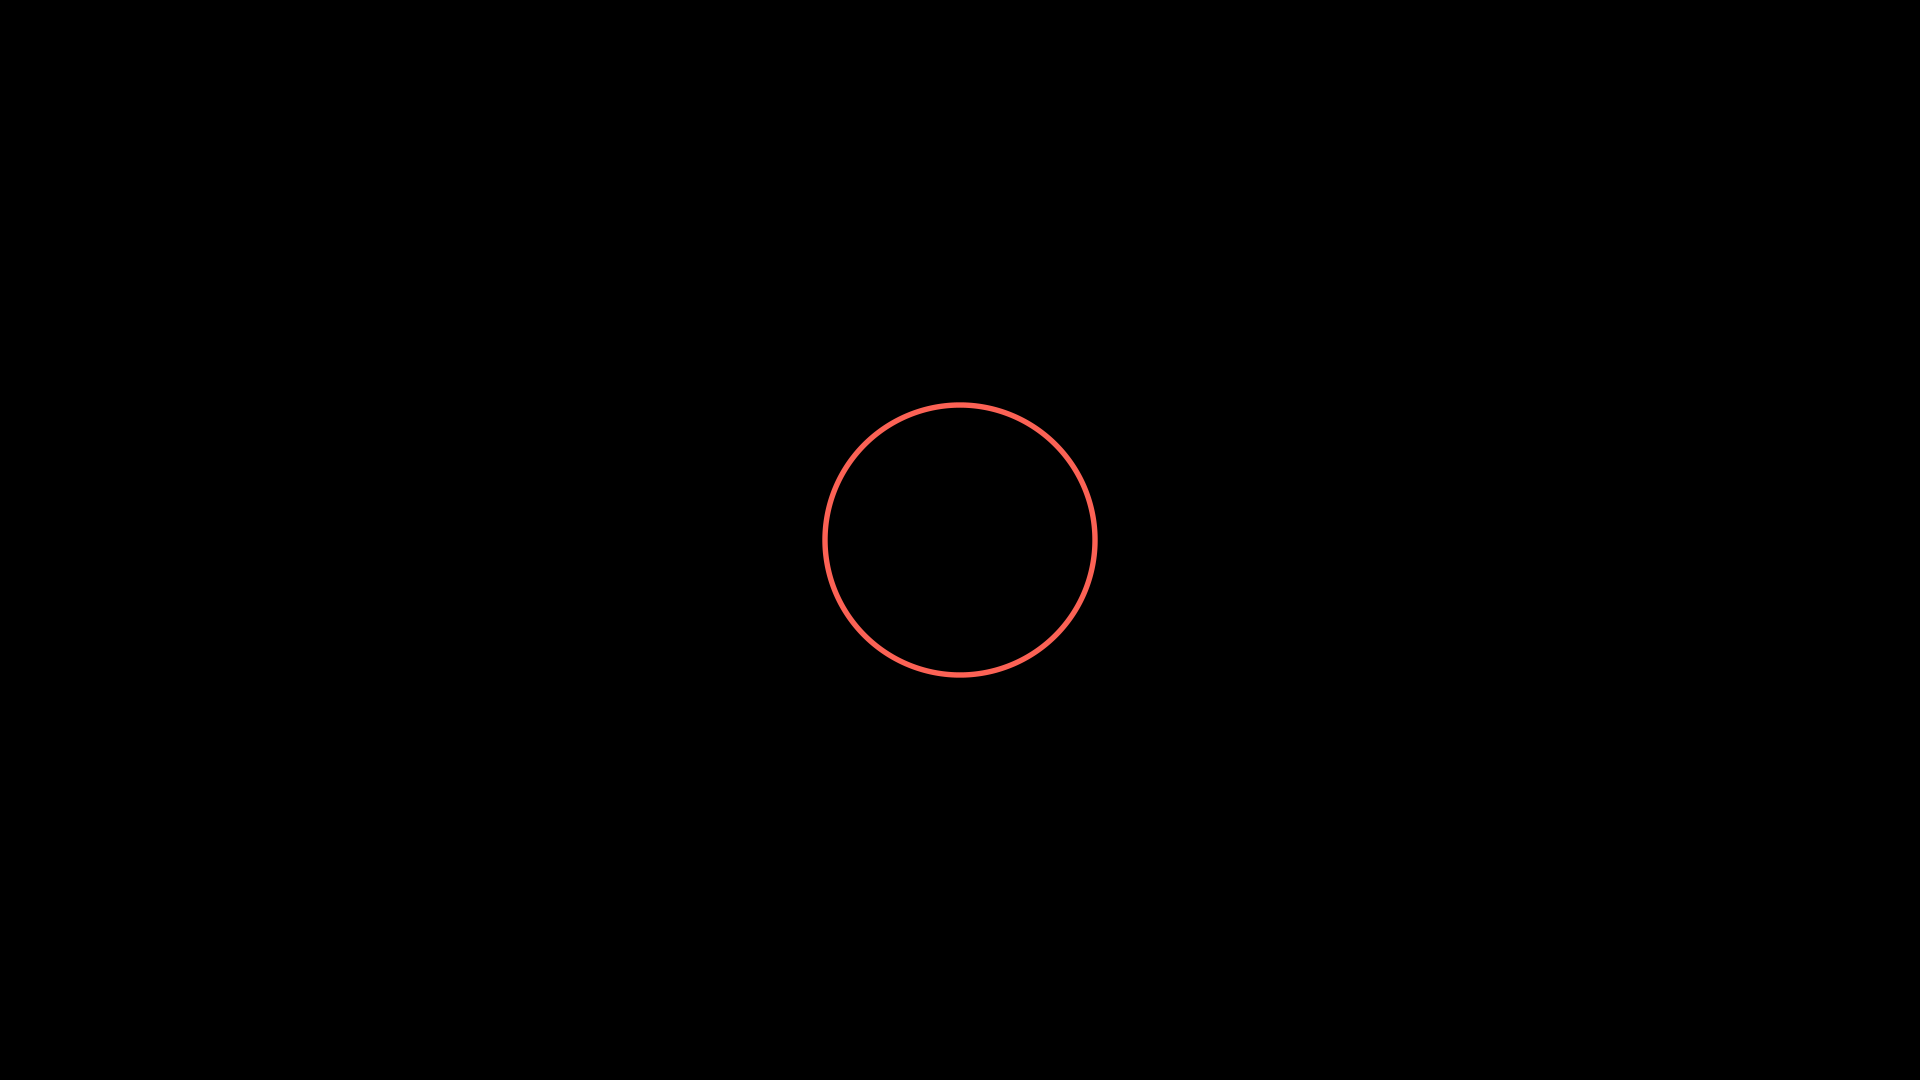

In [4]:
%%manim -qh -v WARNING ParametricCircle

class ParametricCircle(Scene):
    
    def construct(self):
        
        def alpha(t):
            return np.array([np.cos(t), np.sin(t), 0])
    
        circle = ParametricFunction(alpha,
                                    t_range=np.array([0, 2*PI]),
                                    fill_opacity=0).set_color(RED)
        self.add(circle)

Vamos por partes. Primeiro, observe que importamos todas as funções do *namespace* da `Manim`. Isso, em geral, não é considerado uma boa prática em `Python`. Entretanto, como vamos utilizar **muitos** objetos definidos nessa biblioteca, esse é o jeito recomendado de utilizá-la.

Ignorando a primeira linha da célula anterior, vemos que nela definimos a classe `ParametricCircle`, que herda de `Scene`, a qual já é definida pela `Manim`.

Esse é o jeito padrão de criar animações. Cria-se uma classe com o nome que se quiser, a qual herda de `Scene`. O vídeo a ser renderizado é a sua "cena", e precisamos instruir a `Manim` sobre como construí-la. Isso é feito pelo método `construct` da classe.

Nele, criamos `circle`, um `Mobject` (*Mathematical Object*, dentro do jargão da `Manim`).
Esse `Mobject` em específico é uma `ParametricFunction`. Com ele, conseguimos desenhar o traço de uma curva paramétrica especificada por uma função.

Essa função é `alpha`, criada dentro do método `construct` da nossa classe. Ela recebe o tempo como argumento e retorna um *array* com as coordenadas do ponto correspondente, de acordo com a formulação paramétrica do círculo dada anteriormente.

Uma peculiaridade da `Manim` é que, mesmo se tratando de uma figura 2D, precisamos especificar três coordenadas. Poderíamos ter passado qualquer coisa como terceira coordenada, mas, por convenção, colocamos $0$.

Por fim, precisamos adicionar esse objeto recém criado à nossa cena. Isso é feito com o método `add`, o qual já é implementado pela própria `Manim`.

Agora, vamos voltar à primeira linha. Normalmente (fora de um *notebook*), você teria um arquivo `.py` (`curve.py`, por exemplo) no qual escreveria todo o código abaixo da primeira linha da célula anterior e, então, no terminal, executaria o comando

> `manim -qm -v WARNING curves.py ParametricCircle`

Isso faria com que seu *video player* padrão fosse aberto com a imagem acima. Como estamos em um notebook, vamos utilizar esse *magic command* implementado pela `Manim`, para fazer a animação aparecer aqui mesmo.


##### AVISO

**Como não será possível explicar em detalhes tudo o que utilizaremos dessa biblioteca, recomendo fortemente que o leitor desse *notebook* leita o tutorial [Quickstart](https://docs.manim.community/en/stable/tutorials/quickstart.html#overview) e, caso tenha dúvidas ao longo do caminho, consulte o [Manual de Referência](https://docs.manim.community/en/stable/reference.html#).**

A vantagem de utilizar a `Manim`, é que podemos criar animações. Portanto, gostaríamos de poder observar o círculo sendo construído de acordo com a parametrização $\alpha (t)$.
Infelizmente, não há como fazer isso de forma nativa na biblioteca. Vamos ter que ser um pouco mais criativos.

In [5]:
%%manim -qh -v WARNING ParametricCircle

class ParametricCircle(Scene):
    
    def construct(self):
        
        init_t = 0
        
        # Utilizamos esse tracker para obter o tempo total passado
        # desde o início da animação
        time = ValueTracker(value=init_t)
        
        def time_update(mobject, dt):
            mobject.increment_value(dt)
            
        # Atualiza o valor do tempo a cada frame
        time.add_updater(update_function=time_update)
        
        def alpha(t):
            return np.array([np.cos(t), np.sin(t), 0])
        
        # Calcula onde o ponto deve começar
        start = alpha(0)
        dot = Dot(point=start, color=RED)
        
        def dot_update(mobject):
            t = time.get_value()
            mobject.move_to(alpha(t))
        
        # Atualiza a posição do dot a cada frame
        dot.add_updater(update_function=dot_update)
        
        # Desenha o traço da curva com base no dot
        trace = TracedPath(traced_point_func=dot.get_center,
                           stroke_width=3,
                           stroke_color=RED)
        
        number_plane = NumberPlane(
            x_range=[-10, 10, 1],
            y_range=[-10, 10, 1],
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 4,
                "stroke_opacity": 0.4
            }
        )
        
        self.add(number_plane, time, dot, trace)
        
        self.wait(2 * PI)

O código acima é bem mais complexo que o primeiro, então gaste algum tempo lendo a documentação dos métodos utilizados e tentando entendê-lo.
Em especial, leia a documentação de [add_updater](https://docs.manim.community/en/stable/reference/manim.mobject.mobject.Mobject.html#manim.mobject.mobject.Mobject.add_updater).

A ideia é criar objetos cuja posição pode ser recalculada a cada frame da imagem utilizando, nesse cálculo, o tempo passado desde o início da animação. Então, realizamos um `wait`, o qual geralmente é utilizado para fazer pausas em animações, mas que nós estamos utilizando para deixar o tempo passar, e assim, fazer com que o `dot` se mova na velocidade especicada pela função `alpha`.

#### Exemplo: Reta

Uma reta em $\mathbb{R}^2$ é definida por meio de um ponto inicial $p$ e um vetor diretor $v$.
O traço da curva $\alpha : \mathbb{R} \to \mathbb{R}^2$ dada por
$$
    \alpha (t) = p + tv
$$
é a reta que passa por $p$ e é paralela a $v$.

Vamos animar essa curva.

In [6]:
%%manim -qh -v WARNING ParametricLine

class ParametricLine(Scene):
    
    def construct(self):
        
        p = np.array([-2.5, -0.5, 0])
        v = np.array([5.0, 1.0, 0])
        v /= np.linalg.norm(v)
        
        init_t = 0
        
        # Utilizamos esse tracker para obter o tempo total passado
        # desde o início da animação
        time = ValueTracker(value=init_t)
        
        def time_update(mobject, dt):
            mobject.increment_value(dt)
            
        # Atualiza o valor do tempo a cada frame
        time.add_updater(update_function=time_update)
        
        def alpha(t):
            return p + t*v
        
        # Calcula onde o ponto deve começar
        start = alpha(0)
        dot = Dot(point=start, color=RED)
        
        def dot_update(mobject):
            t = time.get_value()
            mobject.move_to(alpha(t))
        
        # Atualiza a posição do dot a cada frame
        dot.add_updater(update_function=dot_update)
        
        # Desenha o traço da curva com base no dot
        trace = TracedPath(traced_point_func=dot.get_center,
                           stroke_width=3,
                           stroke_color=RED)
        
        number_plane = NumberPlane(
            x_range=[-10, 10, 1],
            y_range=[-10, 10, 1],
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 4,
                "stroke_opacity": 0.4
            }
        )
        
        self.add(number_plane, time, dot, trace)
        
        self.wait(5)

### Velocidade e aceleração

Exigimos a diferenciabilidade das nossas curvas para que pudéssemos derivá-las. Nesse sentido, dada uma curva $\alpha : I \subset \mathbb{R} \to \mathbb{R}^n$, definimos os seus vetores *velocidade* e *aceleração* como $\alpha' : I \to \mathbb{R}^n$ e $\alpha'' : I \to \mathbb{R}^n$, respectivamente.

#### Sympy

No exemplo que vimos anteriormente, facilmente podemos calcular manualmente $\alpha' (t) = (- \sin t, \cos t)$. Entretanto, nem sempre há essa facilidade, principalmente quando formos calcular o comprimento de arco de curvas.
Portanto, vamos utilizar a biblioteca `Sympy` para nos auxiliar.

In [3]:
import sympy as sp

Recomendamos a leitura do [tutorial](https://docs.sympy.org/latest/tutorial/index.html#tutorial) para ter uma visão mais ampla das funcionalidades dessa biblioteca. Aqui, utilizaremos apenas o básico.

Definimos variáveis como a seguir:

In [8]:
t = sp.Symbol("t")

E, a partir daí, podemos fazer contas com essa variável:

In [9]:
x_sym = sp.cos(t) # sym for symbolic
y_sym = sp.sin(t)
x_sym, y_sym

(cos(t), sin(t))

Para diferenciar, fazemos

In [10]:
dx_sym = sp.diff(x_sym, t)
dy_sym = sp.diff(y_sym, t)
dx_sym, dy_sym

(-sin(t), cos(t))

Para obter a aceleração:

In [11]:
ddx_sym = sp.diff(dx_sym, t)
ddy_sym = sp.diff(dy_sym, t)
ddx_sym, ddy_sym

(-cos(t), -sin(t))

Com isso, conseguimos calcular os vetores velocidade e aceleração para todas as curvas que exploraremos nesse tutorial.

Entretanto, um problema que precisamos resolver para integrar `Sympy` e `Manim` é que, como vimos anteriormente, precisamos de passar uma função *numérica* como updater para o `dot` quando estamos construindo a animação.
Felizmente, o `Sympy` possui uma forma de converter uma função simbólica em uma numérica, que recebe um `float` como argumento.

Isso é feito da seguinte forma:

In [12]:
x = sp.lambdify(t, x_sym, "numpy") # Retorna uma função numpy
y = sp.lambdify(t, y_sym, "numpy")

[x(np.pi/2), y(np.pi/2)]

[6.123233995736766e-17, 1.0]

#### Exemplo: Parábola

Vamos animar agora a curva $\alpha : I \to \mathbb{R}$ dada por
$$
    \alpha (t) = (t, t^2 - 3)
$$
que corresponde ao gráfico de uma parábola, utilizando `Sympy`.
Dessa vez, vamos incluir seu vetor velocidade.

In [4]:
%%manim -qh -v WARNING ParametricParabola

class ParametricParabola(Scene):
    
    def construct(self):
        
        t = sp.Symbol("t")
        x_sym = t
        y_sym = t**2 - 3
        dx_sym = sp.diff(x_sym, t)
        dy_sym = sp.diff(y_sym, t)
        
        x = sp.lambdify(t, x_sym, "numpy")
        y = sp.lambdify(t, y_sym, "numpy")
        dx = sp.lambdify(t, dx_sym, "numpy")
        dy = sp.lambdify(t, dy_sym, "numpy")
        
        
        init_t = -3
        time = ValueTracker(value=init_t)
        
        def time_update(mobject, dt):
            mobject.increment_value(dt)
            
        time.add_updater(update_function=time_update)
        
        
        def alpha(t):
            return np.array([x(t), y(t), 0])
        
        start = alpha(0)
        dot = Dot(point=start, color=RED)
        
        def dot_update(mobject):
            t = time.get_value()
            mobject.move_to(alpha(t))
        
        dot.add_updater(update_function=dot_update)
        
        
        def velocity(t):
            return np.array([dx(t), dy(t), 0])
        
        velocity_vec = Vector(velocity(init_t), color=RED)
        
        def velocity_vec_updater(vec, _=None):
            t = time.get_value()
            start = dot.get_center()
            end = start + velocity(t)
            vec.put_start_and_end_on(start, end)
            
        velocity_vec.add_updater(velocity_vec_updater,
                                 call_updater=True)
        
        
        trace = TracedPath(traced_point_func=dot.get_center,
                           stroke_width=3,
                           stroke_color=RED)
        
        
        number_plane = NumberPlane(
            x_range=[-10, 10, 1],
            y_range=[-10, 10, 1],
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 4,
                "stroke_opacity": 0.4
            }
        )
        
        self.add(number_plane, time, dot, trace, velocity_vec)
        
        self.wait(6)

/home/caiolins/.local/lib/python3.8/site-packages/manim/mobject/value_tracker.py:74: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
  self.set_points(np.zeros((1, 3)))


Agora está ficando mais claro que animar curvas paramétricas respeitando a velocidade imposta pela parametrização não é algo muito trivial na `Manim`. Para facilitar nossa vida e evitar muita repetição de código, vamos importar a classe `Curve2D`, implementada no módulo `Curve2D.py`, que nos permitirá apenas especificar quais as funções (simbólicas!) das coordenadas e obter uma série de objetos para adicionar à nossa animação.

In [6]:
from Curve2D import Curve2D

Para exemplificar o uso dessa classe, vamos refazer a animação anterior:

In [15]:
%%manim -qh -v WARNING ParametricParabola

class ParametricParabola(Scene):
    
    def construct(self):
        
        t = sp.Symbol("t")
        alpha = [t, t**2-3]
        
        curve = Curve2D(name="alpha", t=t, vector_sym=alpha,
                        init_t=-3, color=RED)
        
        number_plane = NumberPlane(
            x_range=[-10, 10, 1],
            y_range=[-10, 10, 1],
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 4,
                "stroke_opacity": 0.4
            }
        )
        
        self.add(number_plane, curve.time_m, curve.dot_m,
                 curve.path_m, curve.velocity_m)
        
        self.wait(6)

/home/caiolins/.local/lib/python3.8/site-packages/manim/mobject/value_tracker.py:74: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
  self.set_points(np.zeros((1, 3)))


#### Exemplo: Curva de Lissajous

Vamos mostrar outras funcionalidades implementadas na classe `Curve2D` por meio da animação da *curva de Lissajous*. As curvas de Lissajous são dadas por funções paramétricas $\alpha : I \to \mathbb{R}^2$ que são da forma
$$
    \alpha (t) = (A \sin (at + \delta), B \sin (bt)).
$$

No nosso caso, mostraremos o caso em que $ A = B = 1$, $\delta = \pi / 2$, $a = 3$ e $b = 2$, ou seja,
$$
    \alpha (t) = (\sin (3t + \pi / 2), \sin 2t).
$$

In [16]:
%%manim -qh -v WARNING ParametricLissajous

class ParametricLissajous(Scene):
    
    def construct(self):
        
        t = sp.Symbol("t")
        alpha = [sp.sin(3*t + PI/2), sp.sin(2*t)]
        
        scale = 2
        speed = 1/scale
        init_t = -2 * PI * scale
        final_t = 2 * PI * scale
        
        curve = Curve2D(name="alpha", t=t, vector_sym=alpha,
                        init_t=init_t, color=RED, speed=speed,
                        scale=scale)
        curve.acceleration_m.set_color(BLUE)
        
        number_plane = NumberPlane(
            x_range=[-10, 10, scale],
            y_range=[-10, 10, scale],
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 4,
                "stroke_opacity": 0.4
            }
        )
        
        self.add(number_plane, curve.time_m, curve.dot_m,
                 curve.path_m, curve.velocity_m,
                 curve.acceleration_m, curve.acceleration_name_m,
                 curve.velocity_name_m)
        
        self.wait(final_t)

/home/caiolins/.local/lib/python3.8/site-packages/manim/mobject/value_tracker.py:74: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
  self.set_points(np.zeros((1, 3)))


#### Exemplo: Curva de Talbot

Outra curva interessante (retirada [deste site](https://mathshistory.st-andrews.ac.uk/Curves/)) é a *Curva de Talbot*.
Sua formulação paramétrica é

$$
    \alpha (t) = ((a^2 + f^2 (\sin t)^2) \cos(t) / a, (a^2 - 2 f^2 + f^2 (\sin t)^2)\sin(t) / b),
$$

Vamos animá-la com os valores $a = 1.1$, $b = 0.666$ e $f = 1$.

In [7]:
%%manim -qh -v WARNING ParametricTalbot

class ParametricTalbot(Scene):
    
    def construct(self):
        
        t = sp.Symbol("t")
        alpha = [
            (1.1**2 + sp.sin(t)**2) * sp.cos(t) / 1.1,
            (1.1**2 - 2 + sp.sin(t)**2) * sp.sin(t) / 0.666
        ]
        
        scale = 2
        speed = 1/scale
        init_t = -PI * scale
        final_t = PI * scale
        delta_t = final_t - init_t
        
        curve = Curve2D(name="alpha", t=t, vector_sym=alpha,
                        init_t=init_t, color=RED, speed=speed,
                        scale=scale)
        curve.acceleration_m.set_color(BLUE)
        
        number_plane = NumberPlane(
            x_range=[-10, 10, scale],
            y_range=[-10, 10, scale],
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 4,
                "stroke_opacity": 0.4
            }
        )
        
        self.add(number_plane, curve.time_m, curve.dot_m,
                 curve.path_m, curve.velocity_m,
                 curve.acceleration_m, curve.acceleration_name_m,
                 curve.velocity_name_m)
        
        self.wait(delta_t)

/home/caiolins/.local/lib/python3.8/site-packages/manim/mobject/value_tracker.py:74: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
  self.set_points(np.zeros((1, 3)))


#### Exemplo: Curva aleatória

[Esse site](http://www.sineofthetimes.org/the-art-of-parametric-equations-2/) também é legal para obter curvas com traços interessantes. Vamos animar uma das curvas encontradas:

$$
    \alpha(t) = \left(\cos(t), + \frac{\cos(6t)}{2} + \frac{\sin(14t)}{3}, \sin(t) + \frac{\sin(6t)}{2} + \frac{\cos(14t)}{3}\right)
$$

In [18]:
%%manim -qh -v WARNING ParametricTalbot

class ParametricTalbot(Scene):
    
    def construct(self):
        
        t = sp.Symbol("t")
        alpha = [
            sp.cos(t) + sp.cos(6*t)/2 + sp.sin(14*t)/3,
            sp.sin(t) + sp.sin(6*t)/2 + sp.cos(14*t)/3
        ]
        
        scale = 2
        speed = .101
        init_t = -10 * PI
        final_t = 10 * PI
        delta_t = final_t - init_t
        
        curve = Curve2D(name="alpha", t=t, vector_sym=alpha,
                        init_t=init_t, color=RED, speed=speed,
                        scale=scale)
        curve.acceleration_m.set_color(BLUE)
        
        number_plane = NumberPlane(
            x_range=[-10, 10, scale],
            y_range=[-10, 10, scale],
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 4,
                "stroke_opacity": 0.4
            }
        )
        
        self.add(number_plane, curve.time_m, curve.dot_m,
                 curve.path_m, curve.velocity_m,
                 curve.acceleration_m, curve.acceleration_name_m,
                 curve.velocity_name_m)
        
        self.wait(delta_t)

/home/caiolins/.local/lib/python3.8/site-packages/manim/mobject/value_tracker.py:74: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
  self.set_points(np.zeros((1, 3)))


### Comprimento de Arco e Reparametrizações

Além de derivar nossas curvas, também gostaríamos de medi-las. Entretanto, para isso vamos exigir mais uma característica. Uma curva $\alpha : I \to \mathbb{R}^n$ é dita *regular* se
$$
    \alpha' (t) \neq 0
$$
para todo $t \in I$.

Com isso, definimos o *comprimento de arco* de uma curva regular $\alpha$ entre os tempos $a$ e $b$ como
$$
    L^b_a (\alpha) =
    \int_a^b | \alpha' (t) | dt
$$
Apenas para ver que essa definição faz sentido, vamos calcular o comprimento da circunferência. Sua parametrização é dada por $\alpha(t) = (\cos t, \sin t)$ com $t \in [0, 2\pi]$, de modo que $\alpha' (t) = (-\sin t, \cos t)$ e, assim, $|\alpha' (t)| = \sqrt{(-\sin t)^2 + (\cos t)^2} = \sqrt{1} = 1$. Portanto:
$$
    L^b_a (\alpha) = \int_0^{2\pi} dt = 2 \pi
$$

Vendo que essa definição faz sentido, definimos agora um tipo de curva parametrizada que é muito útil. Uma curva regular $\alpha : I \to \mathbb{R}^n$ é dita *parametrizada por comprimento de arco* (*unit speed*, ou, apenas, *u.s.*) se $|\alpha' (t)| = 1$ para todo $t \in I$.

#### Difeomorfismos

Dados intervalos abertos $I, J$, dizemos que a função $\varphi : J \to I$ é um *difeomorfismo* se ela for diferenciável com inversa diferenciável. É uma consequência do *Teorema da Função Inversa* que, sendo este o caso, $\varphi$ tem derivada não nula em $J$.

Difeomorfismos são importantes para *reparametrizar* curvas. Tendo uma curva regular $\alpha : I \to \mathbb{R}^n$ e um difeomormismo $\varphi : J \to I$, dizemos que $\beta = \alpha \circ \varphi$ é uma *reparametrização* da curva $\alpha$.

É interessante perceber que, nessas condições, o comprimento de arco não se altera, no seguinte sentido:
$$
    L_a^b (\beta)  = L_{\varphi(a)}^{\varphi(b)} (\alpha)
$$

De fato:

$$
    L_a^b (\beta)
    = \int_a^b |\beta' (s)| ds
    = \int_a^b |(\alpha \circ \varphi)' (s)| ds
    = \int_a^b |\alpha' (\varphi (s)) \varphi' (s)| ds
    = \int_a^b |\alpha' (\varphi (s))| |\varphi' (s)| ds
    = \int_{\varphi(a)}^{\varphi(b)} |\alpha'(t)| dt
    = L_{\varphi(a)}^{\varphi(b)} (\alpha),
$$

onde a penúltima igualdade se deve à fórmula de mudança de variáveis do cálculo integral, tomando $t = \varphi(s)$.



#### Reparametrizações unit speed

Tendo definido o que é uma curva *u.s.* e como reparametrizar curvas, fica o questionamento: Toda curva possui uma reparametrização que a torna *u.s.*? A resposta é sim! Acontece que, se temos $I = (a, b)$, definindo $\psi : I \to J \subset \mathbb{R}$ por

$$
    \psi (t) = L_a^t (\alpha),
$$

é possível provar que $\psi$ é um difeomorfismo. Denotando sua inversa por $\varphi$, afirmamos que $\beta = \alpha \circ \varphi$ está parametrizada por comprimento de arco. Antes de provarmos esse fato, observe que, pelo Teorema da Função Inversa, temos

$$
    \varphi' (s) = \frac{1}{\psi'(t)},
$$

onde $s = \psi(t)$. Porém, pelo Teorema Fundamental do Cálculo, $\psi' (t) = |\alpha' (t)|$. Logo:

$$
    \varphi' (s) = \frac{1}{|\alpha' (t)|} = \frac{1}{|\alpha' (\varphi (s))|}
$$

Com isso, veja que

$$
    |\beta' (s)|
    = |\alpha' (\varphi (s)) \cdot \varphi' (s)|
    = |\alpha' (\varphi (s)) | \cdot \frac{1}{|\alpha' (\varphi (s))|}
    = 1
$$

De modo que $\beta$ é uma reparametrização de $\alpha$ por comprimento de arco.

#### Exemplo: Catenária

Vamos analisar uma curva chamada de *catenária*, que é o gráfico do cosseno hiperbólico:

$$
    \alpha (t) = (t, \cosh t),
$$

onde $\cosh$ é a parte par da função exponencial, isto é:

$$
    \cosh t = \frac{e^t + e^{-t}}{2}
$$


In [8]:
%%manim -qh -v WARNING ParametricCatenary

class ParametricCatenary(Scene):
    
    def construct(self):
        
        t = sp.Symbol("t")
        alpha = [
            t,
            sp.cosh(t)
        ]
        
        scale = 1
        speed = 1/scale
        init_t = -2.2 
        final_t = 2.2
        delta_t = final_t - init_t
        
        curve = Curve2D(name="alpha", t=t, vector_sym=alpha,
                        init_t=init_t, color=RED, speed=speed,
                        scale=scale)
        curve.acceleration_m.set_color(BLUE)
        
        number_plane = NumberPlane(
            x_range=[-10, 10, scale],
            y_range=[-10, 10, scale],
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 4,
                "stroke_opacity": 0.4
            }
        )
        
        self.add(number_plane, curve.time_m, curve.dot_m,
                 curve.path_m, curve.velocity_m,
                 curve.acceleration_m, curve.acceleration_name_m,
                 curve.velocity_name_m)
        
        self.wait(delta_t)

/home/caiolins/.local/lib/python3.8/site-packages/manim/mobject/value_tracker.py:74: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
  self.set_points(np.zeros((1, 3)))


Vamos calcular o comprimento de arco dela utilizando `Sympy`:

In [20]:
x, y = t, sp.cosh(t)
dx, dy = sp.diff(x), sp.diff(y)
norm = sp.sqrt(dx**2 + dy**2)
norm = norm.simplify()
norm

sqrt(cosh(t)**2)

Como $\cosh t > 0$ para todo $t \in \mathbb{R}$, temos que $|\alpha' (t)| = \cosh t$. Integrando, temos:

In [21]:
sp.integrate(norm)

sqrt(cosh(t)**2)*sinh(t)/cosh(t)

Vemos que o `Sympy` está precisando de uma ajudinha. Pelo que foi dito acima, está claro que a integral do comprimento de arco é dada por $\sinh$.

Essa é nossa função $\psi$. A função $\varphi$ é a inversa dela, dada por $\text{arcsinh}$. Com isso, obtemos uma reparametrização por comprimento de arco. Vamos animá-la:

In [22]:
%%manim -qh -v WARNING ParametricCatenary

class ParametricCatenary(Scene):
    
    def construct(self):
        
        t = sp.Symbol("t")
        alpha = [
            sp.asinh(t),
            sp.cosh(sp.asinh(t))
        ]
        
        scale = 1
        speed = 1/scale
        init_t = -5 
        final_t = 5
        delta_t = final_t - init_t
        
        curve = Curve2D(name="alpha", t=t, vector_sym=alpha,
                        init_t=init_t, color=RED, speed=speed,
                        scale=scale)
        curve.acceleration_m.set_color(BLUE)
        
        number_plane = NumberPlane(
            x_range=[-10, 10, scale],
            y_range=[-10, 10, scale],
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 4,
                "stroke_opacity": 0.4
            }
        )
        
        self.add(number_plane, curve.time_m, curve.dot_m,
                 curve.path_m, curve.velocity_m,
                 curve.acceleration_m, curve.acceleration_name_m,
                 curve.velocity_name_m)
        
        self.wait(delta_t)

/home/caiolins/.local/lib/python3.8/site-packages/manim/mobject/value_tracker.py:74: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
  self.set_points(np.zeros((1, 3)))


Como você pode perceber, os vetores $\alpha'$ e $\alpha''$ são ortogonais! Isso não é um caso particular. De fato, a reparametrização u.s. implica que $\langle \alpha' (t), \alpha' (t) \rangle = 1$ para todo $t$. Derivando ambos lados da igualdade com relação a $t$, ficamos com:

$$
    \langle \alpha'' (t), \alpha' (t) \rangle +
    \langle \alpha' (t), \alpha'' (t) \rangle = 0
    \iff
    2 \langle \alpha' (t), \alpha'' (t) \rangle = 0
    \iff
    \langle \alpha' (t), \alpha'' (t) \rangle = 0
$$

### Curvas em R<sup>3</sup>

Tudo que fizemos até agora se aplica, sem nenhuma alteração, a $\mathbb{R}^3$.
Nós vamos agora apenas mostrar uma curva tridimensional, desenhada de maneira semelhante com a classe `Curve3D`.
Gostaríamos de ter feito mais uma curva, porém o tempo de renderização é muito alto.

In [23]:
from Curve3D import Curve3D
import sympy as sp
from manim import *

In [24]:
%%manim -qm -v WARNING SpacialCurve

## Infelizmente, aparentemente há um bug no qual o método
## add_updater não funcional para vetores 3D, comprometendo a
## implementação da classe
## Utilizamos, nesse caso, o método .become()

class SpacialCurve(ThreeDScene):
    
    def construct(self):
        
        t = sp.Symbol("t")
        
        c = 1 / np.sqrt(2) # make it u.s.
        
        alpha = [
            sp.cos(t * c),
            sp.sin(t * c),
            t * c
        ]
        
        init_t = - 2 * PI
        final_t = 2 * PI
        delta_t = final_t - init_t
        
        ax = ThreeDAxes(x_range=[-10, 10, 1],
                        y_range=[-10, 10, 1],
                        z_range=[-10, 10, 1])
        
        curve = Curve3D(name="alpha", t=t, vector_sym=alpha,
                        init_t=init_t, color=RED)
        curve.normal_m.set_color(BLUE)
        curve.binormal_m.set_color(GREEN)
        
        self.set_camera_orientation(phi=2*PI/5, theta=PI/5)
        
        self.add(curve.time_m, curve.dot_m, curve.path_m,
                 curve.velocity_m, curve.normal_m, curve.binormal_m,
                 ax)
        
        self.wait(delta_t)

/home/caiolins/.local/lib/python3.8/site-packages/manim/mobject/value_tracker.py:74: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
  self.set_points(np.zeros((1, 3)))


### Referências

* Freire de Lima, Ronaldo. *Introdução à Geometria Diferencial*. Rio de Janeiro, Brasil: Sociedade Brasileira de Matemática, 2016.

* The Manim Community Developers. (2022). Manim – Mathematical Animation Framework (Version v0.15.1) [Computer software]. https://www.manim.community/

* Meurer A, Smith CP, Paprocki M, Čertík O, Kirpichev SB, Rocklin M, Kumar A, Ivanov S, Moore JK, Singh S, Rathnayake T, Vig S, Granger BE, Muller RP, Bonazzi F, Gupta H, Vats S, Johansson F, Pedregosa F, Curry MJ, Terrel AR, Roučka Š, Saboo A, Fernando I, Kulal S, Cimrman R, Scopatz A. (2017) **SymPy**: symbolic computing in Python. PeerJ Computer Science 3:e103 https://doi.org/10.7717/peerj-cs.103